# Experiment with Facebook Prophet

Prophet follows the sklearn model API

Input to Prophet is always a dataframe with two columns: ds and y

ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD or YYYY-MM-DD HH:MM:SS.

y column must be numeric, and represents the measurements we wish to forecast.

## Initial Stuff

In [11]:
import pandas as pd
from prophet import Prophet

In [12]:
df = pd.read_csv('./example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


## Prophet Model Fit

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [13]:
m = Prophet()
m.add_country_holidays('US')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8004.72    0.00592144       553.288           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8025.91    0.00492144       544.902           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8031.24   0.000122763       95.8214      0.2212      0.2212      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8032.97   0.000224147        67.936           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8037.53    0.00600561       127.517           1           1      601   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     503    

## Prediction

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


### predict method

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [15]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.146702,7.458265,8.861510
3266,2017-01-16,9.212637,8.492236,9.948550
3267,2017-01-17,8.254038,7.584345,8.949805
3268,2017-01-18,8.082721,7.372272,8.777533
3269,2017-01-19,8.100416,7.431061,8.808976


## Plotting Forecast Results

You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe

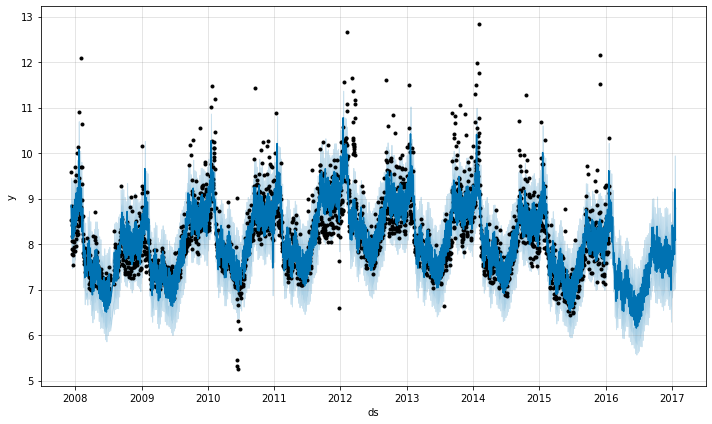

In [16]:
fig1 = m.plot(forecast)

If you want to see the forecast components, you can use the Prophet.plot_components method. By default you'll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you'll see those here, too.

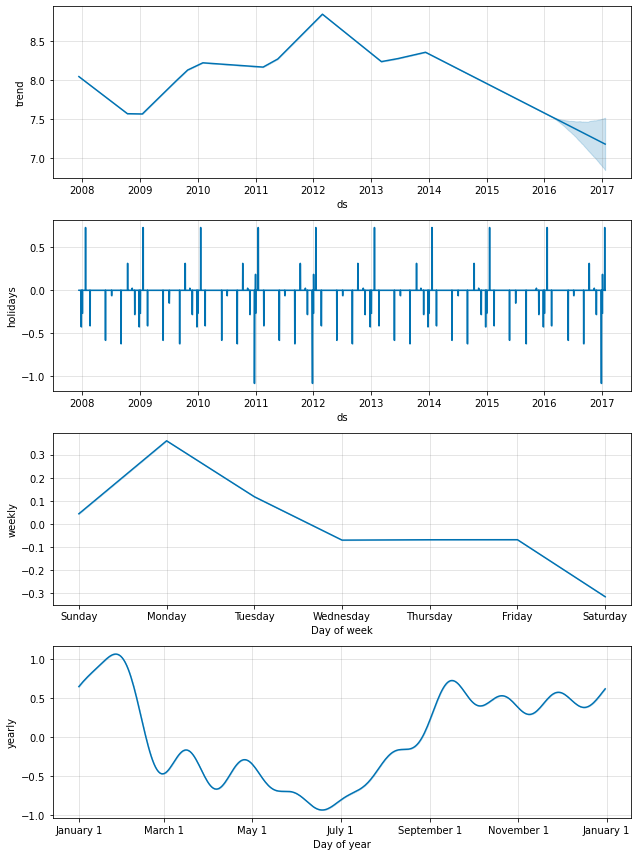

In [17]:
fig2 = m.plot_components(forecast)

An interactive figure of the forecast and components can be created with plotly. You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. You will also need to install the notebook and ipywidgets packages.

In [18]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [19]:
plot_components_plotly(m, forecast)